In [175]:
import pprint as pp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set(font_scale=1.5)

#### 1. 데이터 가져오기

In [113]:
# sklearn.dataset의 load_diabetes에서 데이터를 가져온다.
# diabetes의 data를 df_X에, target을 df_y에 저장한다.
from sklearn.datasets import load_diabetes
import numpy as np
diabetes = load_diabetes()
print(diabetes.keys())
df_X = diabetes.data
df_y = diabetes.target

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


In [114]:
print(df_X.shape)
print(df_y.shape)

(442, 10)
(442,)


In [115]:
print(diabetes.feature_names)
print(diabetes.DESCR)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides lev

target: a quantatitive measure of disease progression

In [116]:
print('data[0]:', df_X[0])
print()
print('target[0]:', df_y[0])

data[0]: [ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990842 -0.01764613]

target[0]: 151.0


In [117]:
print(type(df_X))
print(df_X.shape)
print(diabetes.feature_names)

<class 'numpy.ndarray'>
(442, 10)
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


(10, 442)


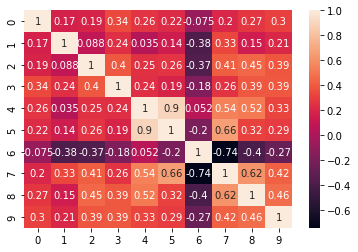

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt
trans_X = df_X.T
print(trans_X.shape)
ax = sns.heatmap(np.corrcoef(trans_X), annot=True)
plt.show()

# (4,5), (5,6), (6,7) 피쳐끼리 상관관계가 강함.
# 그러면 5, 6, 7을 제외하고 학습해보자.

TODOS
* 각 피처값 시각화 
* 피쳐간 상관관계 ✔️ 
* 피쳐 빼서 학습


#### 2. 모델에 입력할 데이터 X 준비하기

In [119]:
df_X = np.array(df_X)

#### 3. 모델에 예측할 데이터 y 준비하기

In [120]:
df_y = np.array(df_y)

#### 4. train 데이터와 test 데이터로 분리하기

In [121]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df_X, df_y, test_size=0.2, random_state=777)


#### 5. 모델 준비하기

In [122]:
print(X_train.shape)
print(y_train.shape)

W = np.random.rand(10)
b = np.random.rand()


(353, 10)
(353,)


In [123]:
def model(X, W, b):
    y = np.dot(X, W) + b
    return y

#### 6. 손실함수 loss 정의하기

In [124]:
def MSE(y1, y2):
    error = ((y1 - y2) ** 2).mean()
    return error

In [125]:
def loss(X, W, b, y):
    y_pred = model(X, W, b)
    error = MSE(y_pred, y)
    return error


#### 7. 기울기를 구하는 gradient 함수 구현하기

In [126]:
def gradient(X, W, b, y):
    y_pred = model(X, W, b)
    dW = 1/len(W) * 2 * X.T.dot(y_pred-y)
    db = 2 * (y_pred - y).mean()
    return dW, db

#### 8. 하이퍼파라미터인 학습률 설정하기

In [135]:
LEARNING_RATE = 0.5

#### 9. 모델 학습하기

In [142]:
W = np.random.rand(10)
b = np.random.rand()


In [143]:
# 학습 전 loss
print(loss(X_train, W, b, y_train))

28437.71819796468


In [144]:
losses = []
for i in range(0, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print(f'Iteration {i} : Loss {L}')

Iteration 0 : Loss 4788.43546662655
Iteration 10 : Loss 3229.1290188068456
Iteration 20 : Loss 3080.3828326019857
Iteration 30 : Loss 3044.1726985220494
Iteration 40 : Loss 3033.8740038281458
Iteration 50 : Loss 3030.375492226992
Iteration 60 : Loss 3028.881789210567
Iteration 70 : Loss 3028.0534948940103
Iteration 80 : Loss 3027.473809571574
Iteration 90 : Loss 3026.9984703799582
Iteration 100 : Loss 3026.572528196574
Iteration 110 : Loss 3026.1732887753296
Iteration 120 : Loss 3025.790700685217
Iteration 130 : Loss 3025.419999912629
Iteration 140 : Loss 3025.058751097205
Iteration 150 : Loss 3024.705591982717
Iteration 160 : Loss 3024.3596782853047
Iteration 170 : Loss 3024.020429809664
Iteration 180 : Loss 3023.687410616361
Iteration 190 : Loss 3023.3602704797836
Iteration 200 : Loss 3023.0387150381357
Iteration 210 : Loss 3022.722489690968
Iteration 220 : Loss 3022.411370260518
Iteration 230 : Loss 3022.1051570960776
Iteration 240 : Loss 3021.8036710141905
Iteration 250 : Loss 3021

#### 10. test 데이터에 대한 성능 확인하기

In [145]:
y_pred = model(X_test, W, b)
mse_test = MSE(y_pred, y_test)
print(mse_test)

2375.0626819969893


#### 11. 정답 데이터와 예측한 데이터 시각화하기

x축에는 X 데이터의 첫번째 컬럼을, y축에는 정답인 target 데이터를 넣어서 모델이 예측한 데이터를 시각화해주세요.

In [156]:
X_test[:,0]

array([-0.04183994,  0.0562386 ,  0.01628068,  0.05987114, -0.01277963,
        0.01991321,  0.0562386 , -0.03457486,  0.0090156 , -0.00551455,
        0.01628068,  0.02354575,  0.01264814, -0.07090025,  0.00175052,
       -0.07090025,  0.0562386 ,  0.01628068, -0.07090025, -0.03457486,
       -0.04183994,  0.06713621,  0.04170844, -0.00188202,  0.04170844,
       -0.02730979, -0.10359309, -0.06726771, -0.02004471, -0.02367725,
        0.02354575, -0.05637009,  0.0090156 , -0.02730979, -0.04547248,
       -0.05637009, -0.09996055, -0.00551455,  0.00175052,  0.02354575,
       -0.05273755, -0.00914709,  0.05260606, -0.06000263,  0.02717829,
        0.01991321, -0.04547248, -0.0854304 , -0.06363517,  0.06350368,
       -0.05637009,  0.08166637, -0.04183994,  0.04170844,  0.02717829,
        0.05987114, -0.02367725, -0.04183994, -0.01641217, -0.01641217,
        0.0090156 ,  0.03081083,  0.01264814, -0.07453279, -0.09632802,
        0.00175052, -0.01641217, -0.00914709,  0.01264814,  0.00

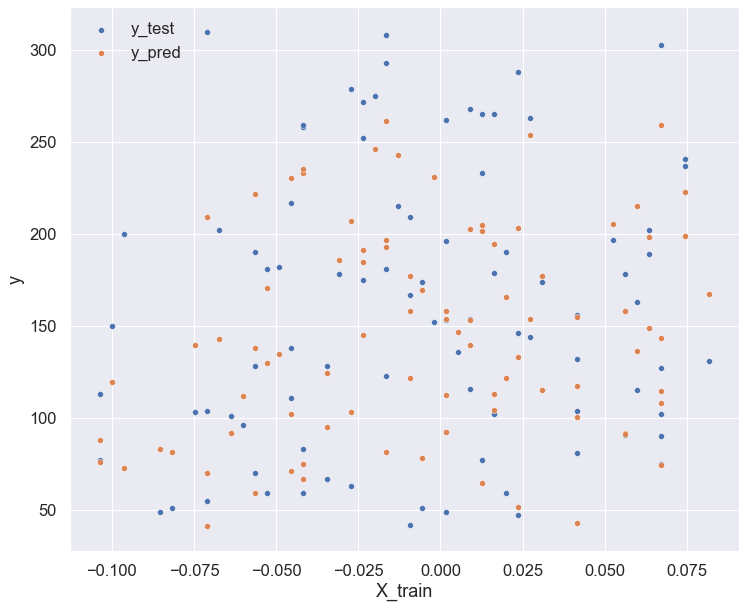

In [177]:
#fig, ax = plt.subplots(111, figsize=(12,10))
fig = plt.figure(figsize=(12, 10))
sns.scatterplot(x = X_test[:,0], y=y_test, label='y_test')
sns.scatterplot(x = X_test[:,0], y=y_pred, label='y_pred')
plt.xlabel('X_train')
plt.ylabel('y')
plt.legend(loc='upper left')
plt.show()
